# Mall project

######We explore and load the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Yael/DEV/Projects-Data/Project2_/Mall_Customers.csv")

######We first display the data so we can get familiar with it and it's kind

In [ ]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##Univariate Analysis


######We display an statistic method to have a general describe of the data

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


######As part of the analisys to find out the kind of population we have, we use the plot function to know the Annual Income ("Money") distribution

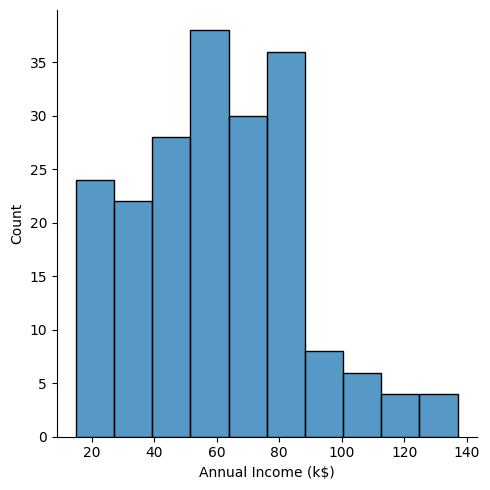

In [ ]:
sns.displot(df['Annual Income (k$)'])


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

######Distribution of Age, Annual Income and Spending Score at the Mall

<Figure size 640x480 with 0 Axes>

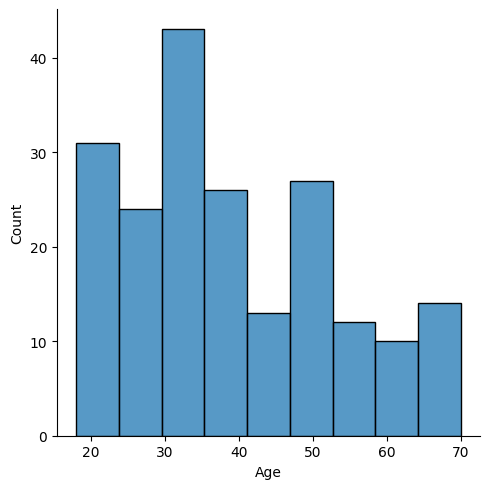

<Figure size 640x480 with 0 Axes>

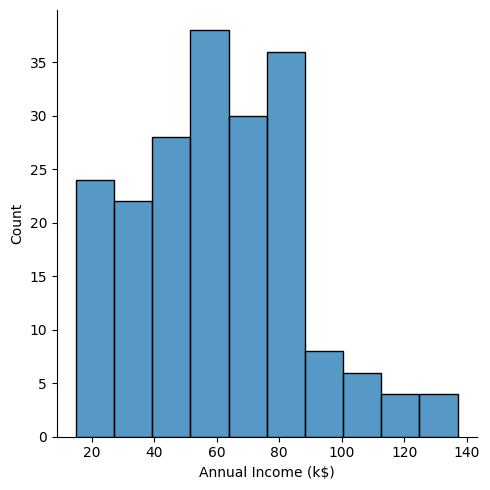

<Figure size 640x480 with 0 Axes>

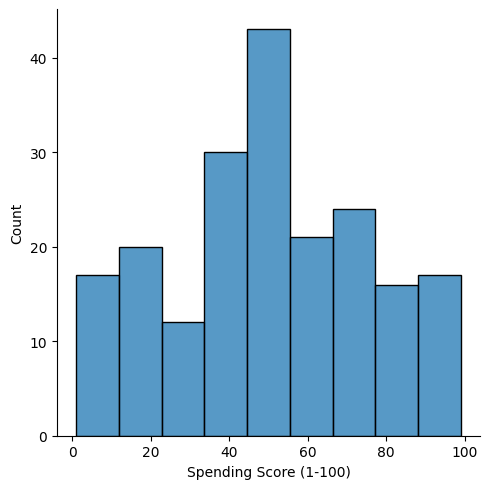

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
  plt.figure()
  sns.displot(df[i])


######As part of the data segmentation, we need to understand the distribution and differences between genders (males and females), we aply the hue meethod at Gender in Annual Income so we can see a clearly difference of anual

```
# This is formatted as code
```

salaries

<ipython-input-135-3c700aa6ccd3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True);


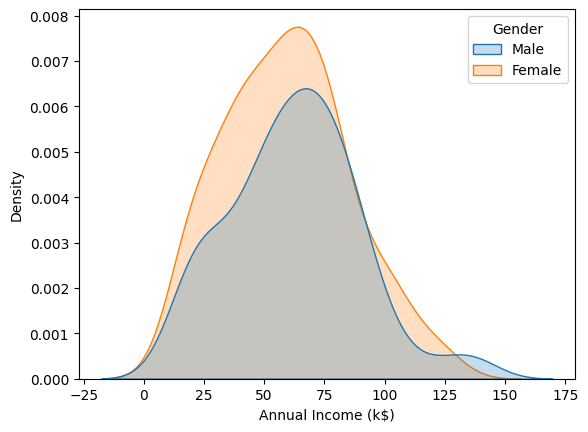

In [ ]:
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', shade=True);


######To be more precise, in the following steps, we perform the same process with each variable

<ipython-input-136-ecf2f129854c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=i, hue='Gender', shade=True);
<ipython-input-136-ecf2f129854c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=i, hue='Gender', shade=True);
<ipython-input-136-ecf2f129854c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=i, hue='Gender', shade=True);


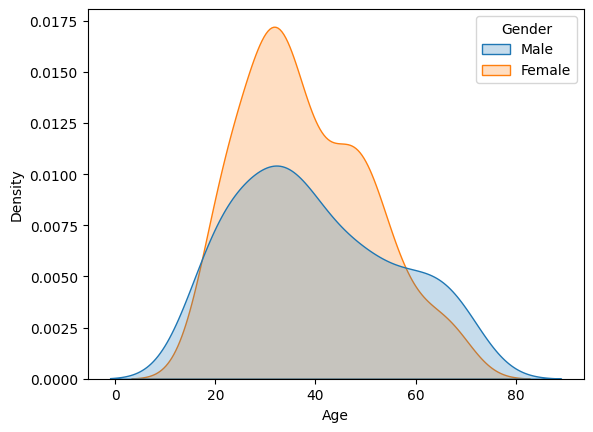

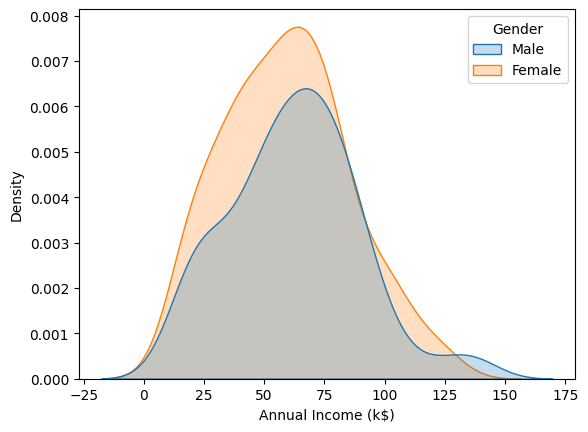

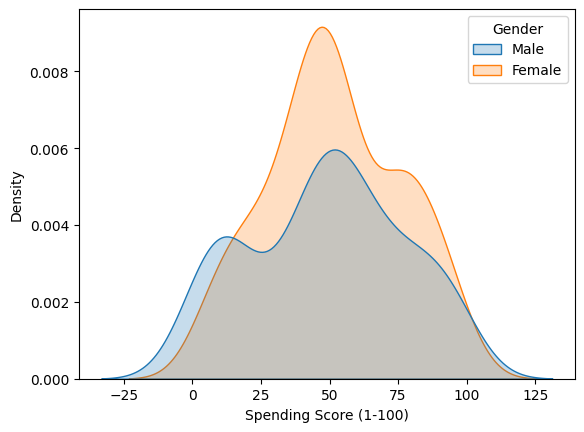

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
  plt.figure()
  sns.kdeplot(data=df, x=i, hue='Gender', shade=True);


#####We use a box plot to understand the distribution of the data and identify outliers.






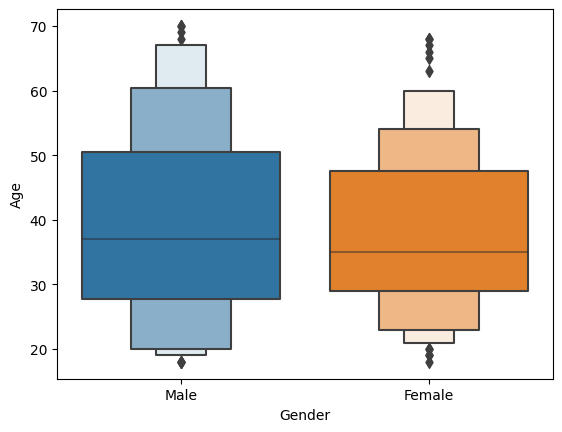

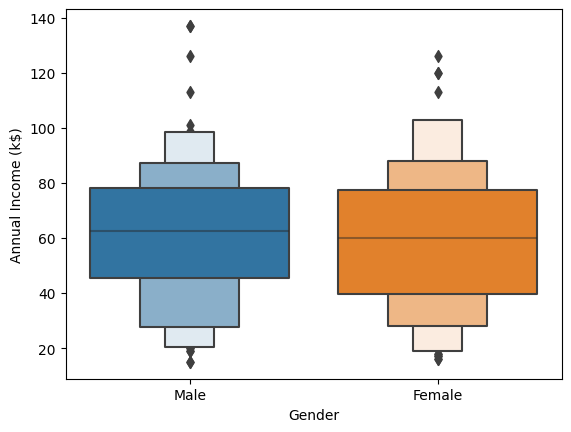

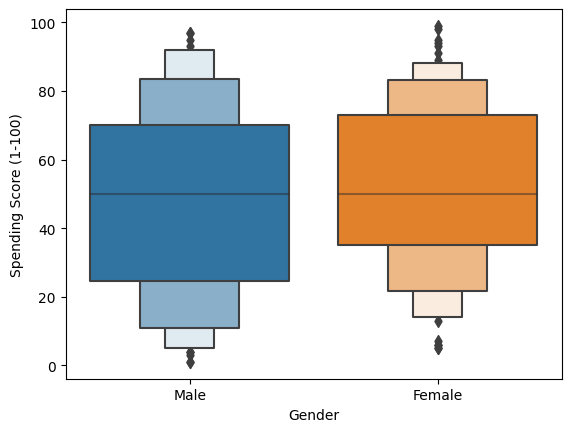

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
  plt.figure()
  sns.boxenplot(data = df , x = 'Gender', y = df[i])

#####We use the value_count to see exactly the differences of number of Male and Female in our data. We also use the normalize argument to say to this method to convert our output on percet

In [ ]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [ ]:
df['Gender'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

#Bivariate Analysis

#####We display an Scatterplot to try to see a patern on the data.


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

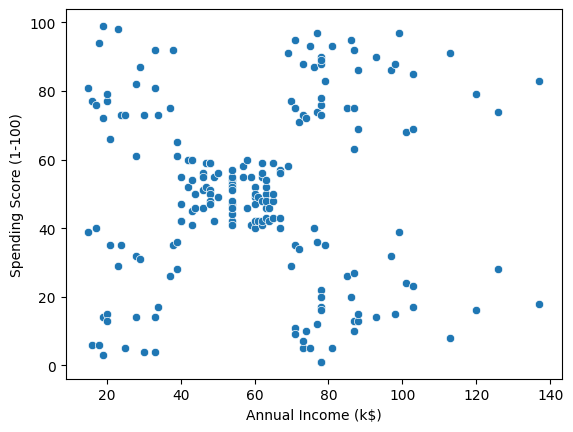

In [ ]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

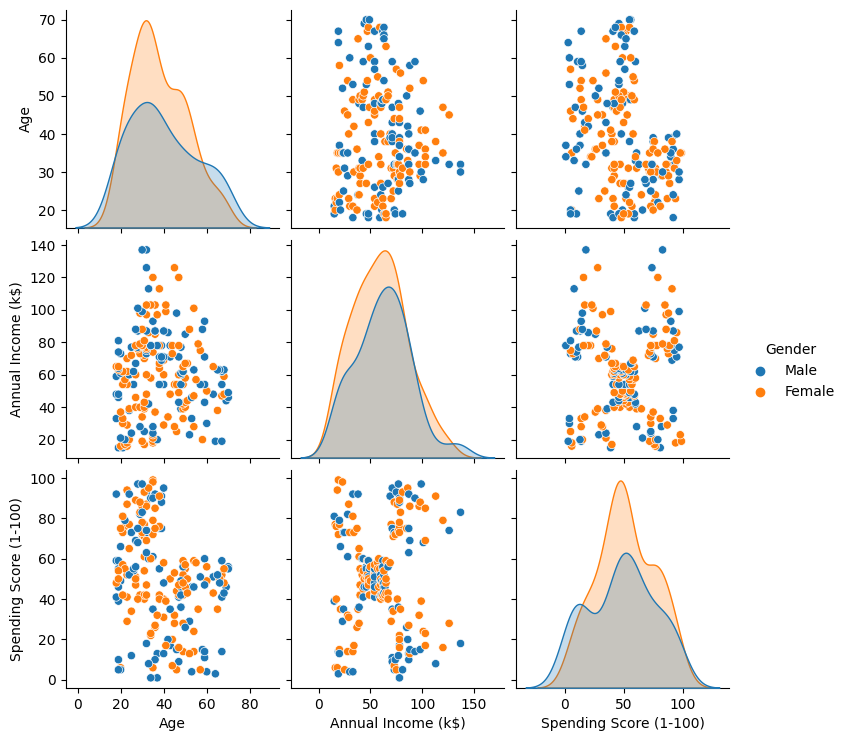

In [ ]:
df1 = df.drop('CustomerID', axis = 1)
sns.pairplot(data = df1, hue = 'Gender')

In [ ]:
df1.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

<ipython-input-142-ec2d8f7a5902>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
df1.corr()

<ipython-input-143-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


#####This part is super important because here is the part where we try to find if it is a relatuion between the variables

<ipython-input-144-24c98efb9540>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df1.corr(), annot = True, cmap = 'coolwarm');


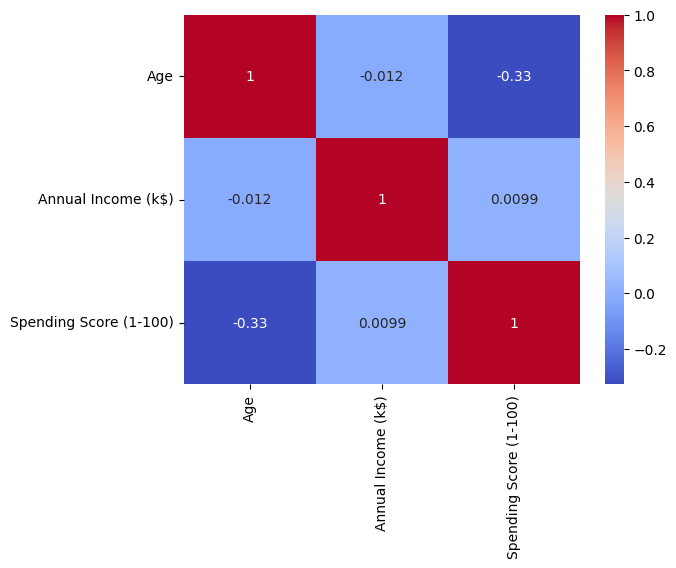

In [ ]:
sns.heatmap(data = df1.corr(), annot = True, cmap = 'coolwarm');

#Clustering - Univariate, Bivariate, Multivariate

#####We use  ML to categorize

In [ ]:
clustering1 = KMeans(n_clusters=3)

In [ ]:
clustering1.fit(df[['Annual Income (k$)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
len(clustering1.labels_)

200

In [ ]:
df1['Income Cluster'] = clustering1.labels_

In [ ]:
df1.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1


In [ ]:
df1[['Income Cluster']].value_counts()

Income Cluster
0                 92
1                 72
2                 36
dtype: int64

In [ ]:
clustering1.inertia_

23528.15217391306

In [ ]:
intertia_score = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df1[['Annual Income (k$)']])
  intertia_score.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
intertia_score

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 4034.0689640768596,
 2822.4996947496966,
 2171.4722222222235,
 1743.4772727272739]

In [ ]:
len(intertia_score)

10

#####This method allows you to find the number of clusters you have to apply to the data, this part is important to speed up

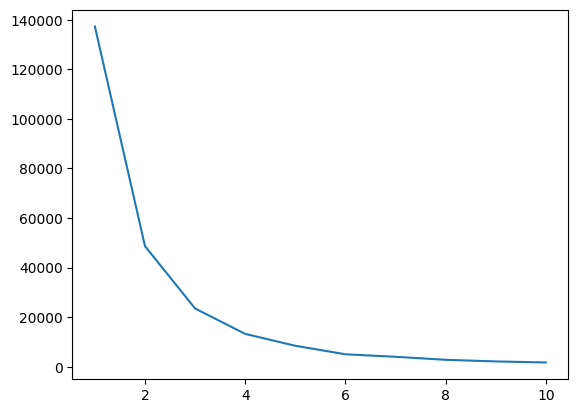

In [ ]:
plt.plot(range(1,11),intertia_score)

In [ ]:
df1.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df['Income Cluster'] = clustering1.labels_

In [ ]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1


In [ ]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

<ipython-input-161-56d0f6fb93a3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Income Cluster')['Age', 'Annual Income (k$)',


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


##Bivariate Clustering

In [ ]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(df[['Annual Income (k$)' , 'Spending Score (1-100)']])
clustering2.labels_
df1['Spending and Income Cluster'] = clustering2.labels_
df1.head(2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,2
1,Male,21,15,81,1,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

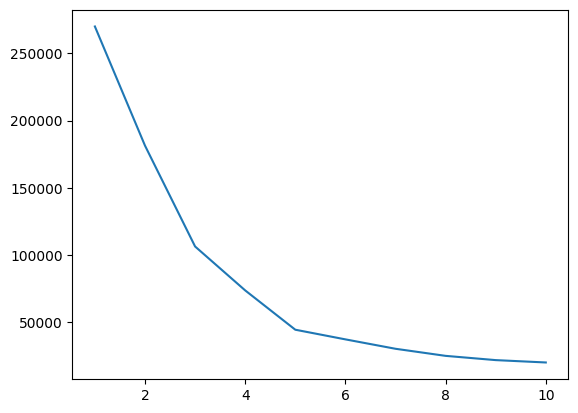

In [ ]:
intertia_score2 = []
for i in range (1,11):
  kmeans2 = KMeans(n_clusters=i)
  kmeans2.fit(df1[['Annual Income (k$)' , 'Spending Score (1-100)']])
  intertia_score2.append(kmeans2.inertia_)

plt.plot(range(1,11),intertia_score2)

#####This is where we can see the data categorizazed and where does each part centers

In [ ]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,25.727273,79.363636
1,86.538462,82.128205
2,26.304348,20.913043
3,88.200000,17.114286
4,55.296296,49.518519


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

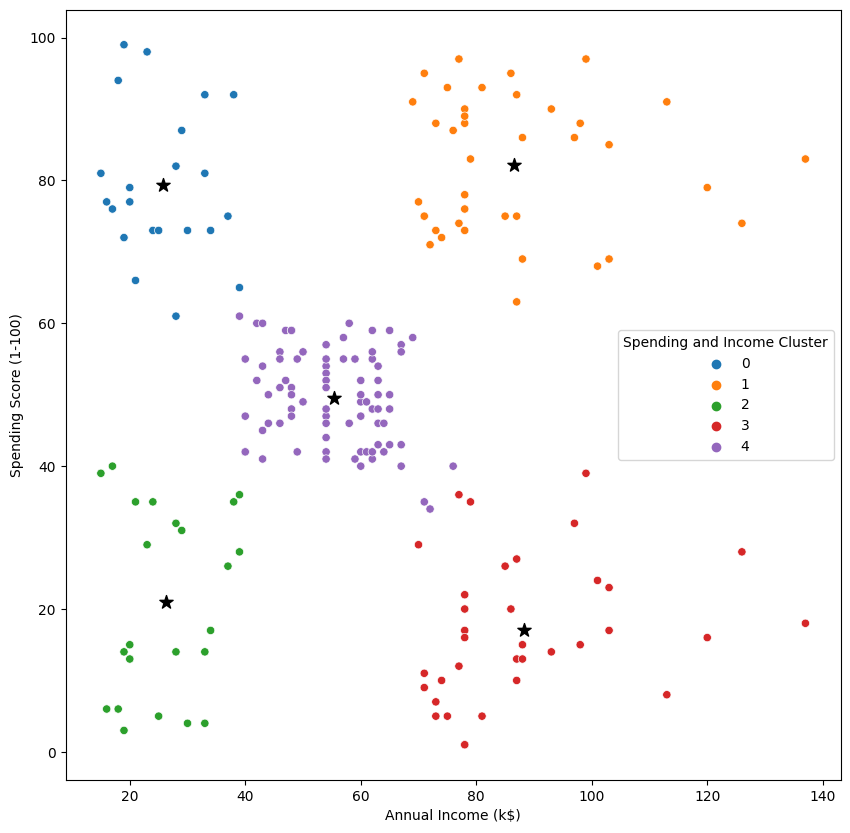

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(x = centers ['x'] , y = centers ['y'], s = 100, c = 'black', marker = '*')
sns.scatterplot(data = df1 , x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette = 'tab10')